# 🎆 Convolutions

In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

## 0. Original Input Image <a name="orig"></a>

(64, 64)


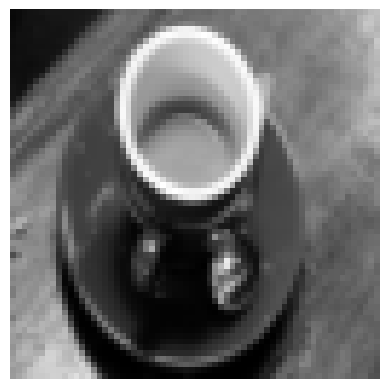

In [2]:
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

## Horizontal Edge Filter <a name="hor"></a>

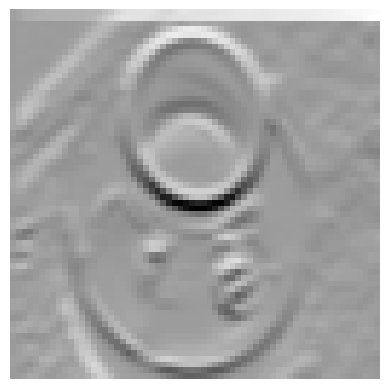

In [3]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter <a name="ver"></a>

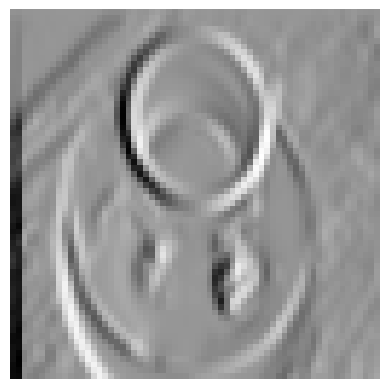

In [4]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Horizontal Edge Filter with Stride 2 <a name="hor2"></a>

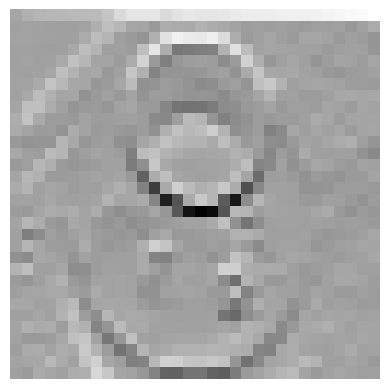

In [5]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter with Stride 2 <a name="ver2"></a>

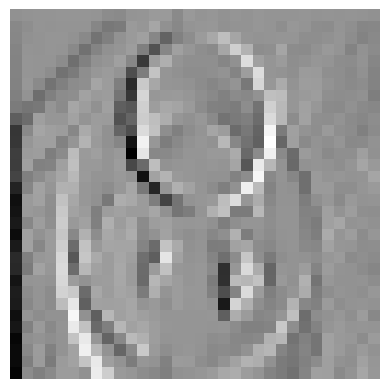

In [6]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

# Assignment

## Importing necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Loading and handling dataset for training and testing

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (for grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Building models with 2 and 3 strides

In [ ]:
# Model 1: Convolutional Layer with stride=2
def build_model_stride_2():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Model 2: Convolutional Layer with stride=3
def build_model_stride_3():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), strides=3, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

## Compiling and training the models

In [ ]:
# Compile the models
model_stride_2 = build_model_stride_2()
model_stride_3 = build_model_stride_3()

model_stride_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_stride_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
print("Training Model with Stride=2...")
history_stride_2 = model_stride_2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

print("\nTraining Model with Stride=3...")
history_stride_3 = model_stride_3.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

## Evaluating the models


Evaluating Model with Stride=2...
313/313 - 0s - 820us/step - accuracy: 0.9814 - loss: 0.0515

Evaluating Model with Stride=3...
313/313 - 0s - 381us/step - accuracy: 0.9620 - loss: 0.1185


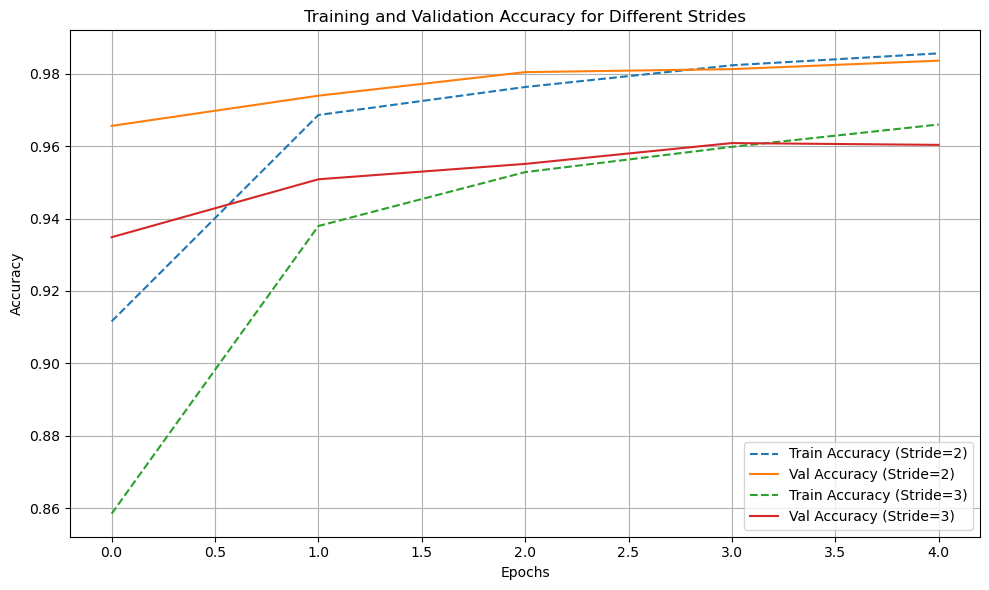

Model with Stride=2 - Test Accuracy: 0.9814
Model with Stride=3 - Test Accuracy: 0.9620


In [3]:
# Evaluate the models
print("\nEvaluating Model with Stride=2...")
test_loss_2, test_acc_2 = model_stride_2.evaluate(x_test, y_test, verbose=2)

print("\nEvaluating Model with Stride=3...")
test_loss_3, test_acc_3 = model_stride_3.evaluate(x_test, y_test, verbose=2)

# Plot the training history
# Plot the training history on the same graph
plt.figure(figsize=(10, 6))
plt.plot(history_stride_2.history['accuracy'], label='Train Accuracy (Stride=2)', linestyle='--')
plt.plot(history_stride_2.history['val_accuracy'], label='Val Accuracy (Stride=2)', linestyle='-')
plt.plot(history_stride_3.history['accuracy'], label='Train Accuracy (Stride=3)', linestyle='--')
plt.plot(history_stride_3.history['val_accuracy'], label='Val Accuracy (Stride=3)', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Strides')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Print final accuracy
print(f"Model with Stride=2 - Test Accuracy: {test_acc_2:.4f}")
print(f"Model with Stride=3 - Test Accuracy: {test_acc_3:.4f}")


## Observation
#### The comparison between the two models reveals that the model with a stride of 2 achieves higher accuracy for both training and validation compared to the model with a stride of 3. This difference is because a smaller stride (2) preserves more spatial information in the feature maps, enabling the model to learn finer details from the input images, which enhances its ability to generalize. In contrast, the larger stride (3) skips more spatial regions, leading to a loss of detailed information and reduced accuracy. Despite the model with stride 3 being computationally faster due to fewer convolution operations, it comes at the cost of accuracy, making the stride of 2 preferable for tasks requiring detailed feature extraction, such as digit classification on MNIST.